<a href="https://colab.research.google.com/github/Kushagratandon12/Introduction_to_tensorflow/blob/master/Quantium_Data_Analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Loading the data in the csv format and then reading and validating the data for data interpretation
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/QVI_purchase_behaviour.csv',index_col = 0)
df = pd.DataFrame(df)
df

,LIFESTAGE,PREMIUM_CUSTOMER
LYLTY_CARD_NBR,,
1000,YOUNG SINGLES/COUPLES,Premium
1002,YOUNG SINGLES/COUPLES,Mainstream
1003,YOUNG FAMILIES,Budget
1004,OLDER SINGLES/COUPLES,Mainstream
1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...
2370651,MIDAGE SINGLES/COUPLES,Mainstream
2370701,YOUNG FAMILIES,Mainstream
2370751,YOUNG FAMILIES,Premium


In [ ]:
#size of the data_set present
print(df.size) #bytes of data
print(df.shape) #row and col in the data defined 

145274
(72637, 2)


In [ ]:
df['LIFESTAGE']

LYLTY_CARD_NBR
1000        YOUNG SINGLES/COUPLES
1002        YOUNG SINGLES/COUPLES
1003               YOUNG FAMILIES
1004        OLDER SINGLES/COUPLES
1005       MIDAGE SINGLES/COUPLES
                    ...          
2370651    MIDAGE SINGLES/COUPLES
2370701            YOUNG FAMILIES
2370751            YOUNG FAMILIES
2370961            OLDER FAMILIES
2373711     YOUNG SINGLES/COUPLES
Name: LIFESTAGE, Length: 72637, dtype: object

In [ ]:
new_df = df[(df['LIFESTAGE']=='YOUNG SINGLES/COUPLES') & (df['PREMIUM_CUSTOMER']=='Premium')]
print(new_df)
print('\n\nTotal number of data enteries for  YOUNG SINGLES/COUPLES which are Premium customers')
print(new_df.shape)

                            LIFESTAGE PREMIUM_CUSTOMER
LYLTY_CARD_NBR                                        
1000            YOUNG SINGLES/COUPLES          Premium
1024            YOUNG SINGLES/COUPLES          Premium
1042            YOUNG SINGLES/COUPLES          Premium
1068            YOUNG SINGLES/COUPLES          Premium
1146            YOUNG SINGLES/COUPLES          Premium
...                               ...              ...
272236          YOUNG SINGLES/COUPLES          Premium
272319          YOUNG SINGLES/COUPLES          Premium
272358          YOUNG SINGLES/COUPLES          Premium
272379          YOUNG SINGLES/COUPLES          Premium
272380          YOUNG SINGLES/COUPLES          Premium

[2574 rows x 2 columns]


Total number of data enteries for  YOUNG SINGLES/COUPLES which are Premium customers
(2574, 2)


In [ ]:
trans_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/QVI_transaction_data.csv',index_col = 0)
trans_df = pd.DataFrame(trans_df)
trans_df.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
DATE,,,,,,,
43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


MERGING THEE TWO DATASET THAT ARE PROVIDED FOR STUDY --- QUANTIUM DATASET

ANALYZING THE DATASET BY JOINING THE BOTH DATASET 

In [ ]:
merged_data = pd.merge(trans_df,df,how='inner',left_on='LYLTY_CARD_NBR' , right_on='LYLTY_CARD_NBR')
merged_data = pd.DataFrame(merged_data)
merged_data

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...
264831,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264833,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [ ]:
merged_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


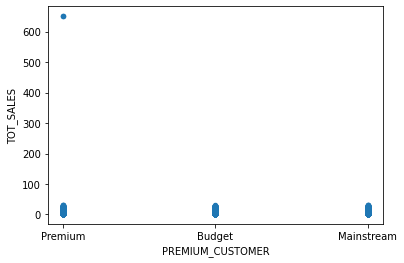

In [ ]:
#GRAPHICAL STUDY 
graph_sales  = pd.DataFrame(merged_data , columns=['TOT_SALES','PREMIUM_CUSTOMER'])
import matplotlib.pyplot as plt

graph_sales.plot(x='PREMIUM_CUSTOMER',y='TOT_SALES',kind='scatter')

In [ ]:
product_names = merged_data['PROD_NAME']
print((product_names)) #-- Labeled Products that are provided
print('TOTAL NUMBERS OF PRODUCTS SELLED IN THE STORE {}'.format(product_names.size))

0          Natural Chip        Compny SeaSalt175g
1                        CCs Nacho Cheese    175g
2                  WW Original Stacked Chips 160g
3                               CCs Original 175g
4          Smiths Crinkle Cut  Chips Chicken 170g
                           ...                   
264831    Kettle Sweet Chilli And Sour Cream 175g
264832              Tostitos Splash Of  Lime 175g
264833                   Doritos Mexicana    170g
264834    Doritos Corn Chip Mexican Jalapeno 150g
264835              Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object
TOTAL NUMBERS OF PRODUCTS SELLED IN THE STORE 264836


In [ ]:
#analysis of the dataset is being done 
young_singles = merged_data[(merged_data['LIFESTAGE']=='YOUNG SINGLES/COUPLES') & (merged_data['PREMIUM_CUSTOMER']=='Premium')]
young_singles.head(6)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
258556,77,77373,75311,40,Thins Chips Seasonedchicken 175g,2,6.6,YOUNG SINGLES/COUPLES,Premium
258557,77,77373,75310,107,Smiths Crinkle Cut French OnionDip 150g,1,2.6,YOUNG SINGLES/COUPLES,Premium
258558,1,1289,329,96,WW Original Stacked Chips 160g,4,7.6,YOUNG SINGLES/COUPLES,Premium
258559,1,1460,539,19,Smiths Crinkle Cut Snag&Sauce 150g,4,10.4,YOUNG SINGLES/COUPLES,Premium
258560,1,1460,540,80,Natural ChipCo Sea Salt & Vinegr 175g,2,6.0,YOUNG SINGLES/COUPLES,Premium


In [ ]:
#studying sales 
Total_Sales  = merged_data[(merged_data['TOT_SALES']>=6.0) & (merged_data['PREMIUM_CUSTOMER']=='Budget')]
Total_Sales

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
5,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
6,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
8,4,4074,2978,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,MIDAGE SINGLES/COUPLES,Budget
9,4,4074,2979,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...
237697,272,272310,270079,40,Thins Chips Seasonedchicken 175g,2,6.6,YOUNG SINGLES/COUPLES,Budget
237698,272,272329,270105,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,YOUNG SINGLES/COUPLES,Budget
237699,272,272329,270106,17,Kettle Sensations BBQ&Maple 150g,2,9.2,YOUNG SINGLES/COUPLES,Budget
237700,272,272336,270113,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Budget


In [ ]:
#TOTAL NUMBER'S OF SALES MADE BY THE SYSTEM IS  ----- 1934414
print("TOTAL NUMBER'S OF SALE'S MADE BY THE SYSTEM IS {}".format(int(merged_data['TOT_SALES'].sum())))
max_sales = merged_data['TOT_SALES'].max()
print('MAXIMUM SALES MADE BY THE STORE/SYSTEM IS -- {} $'.format(max_sales))
min_sales = merged_data['TOT_SALES'].min()
print("MINIMUM SALES MADE BY THE STORE/SYSTEM IS -- {} $ ".format(min_sales))
print(merged_data['TOT_SALES'].idxmax())
merged_data.iloc[71450:71459]

TOTAL NUMBER'S OF SALE'S MADE BY THE SYSTEM IS 1934414
MAXIMUM SALES MADE BY THE STORE/SYSTEM IS -- 650.0 $
MINIMUM SALES MADE BY THE STORE/SYSTEM IS -- 1.5 $ 
71456


,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
71450,225,225119,225386,87,Infuzions BBQ Rib Prawn Crackers 110g,2,7.6,OLDER FAMILIES,Premium
71451,225,225119,225388,98,NCC Sour Cream & Garden Chives 175g,2,6.0,OLDER FAMILIES,Premium
71452,225,225119,225389,62,Pringles Mystery Flavour 134g,2,7.4,OLDER FAMILIES,Premium
71453,225,225119,225390,47,Doritos Corn Chips Original 170g,2,8.8,OLDER FAMILIES,Premium
71454,225,225119,225391,46,Kettle Original 175g,2,10.8,OLDER FAMILIES,Premium
71455,225,225119,225392,67,RRD Chilli& Coconut 150g,2,5.4,OLDER FAMILIES,Premium
71456,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
71457,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
71458,226,226101,226747,77,Doritos Corn Chips Nacho Cheese 170g,1,4.4,OLDER FAMILIES,Premium


In [ ]:
lifestages = merged_data.sort_values('PROD_QTY',ascending=False).groupby('LIFESTAGE').head(3)
lifestages.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
71456,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.00,OLDER FAMILIES,Premium
71457,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.00,OLDER FAMILIES,Premium
34105,97,97211,97600,11,RRD Pc Sea Salt 165g,5,15.00,OLDER FAMILIES,Budget
102451,235,235164,238117,4,Dorito Corn Chp Supreme 380g,5,16.25,OLDER SINGLES/COUPLES,Mainstream
259068,183,183032,184969,21,WW Sour Cream &OnionStacked Chips 160g,5,9.50,YOUNG SINGLES/COUPLES,Premium


In [ ]:
merged_data = merged_data[merged_data['PROD_QTY']>2]
merged_data.head()
merged_data.shape
#TOTAL NUMBER OF ENTERIES WHERE PROD_QTY IS MORE THAN 3

(1279, 9)

In [ ]:
prod_nbr = Total_Sales['PROD_NBR']
print(prod_nbr.duplicated(keep=False))
print("\n\n\tTOTAL NUMBER OF PRODUCTS REMOVING THE DUPLICATES ARE ---- {}".format(prod_nbr.size))

1         True
5         True
6         True
8         True
9         True
          ... 
237697    True
237698    True
237699    True
237700    True
237701    True
Name: PROD_NBR, Length: 65597, dtype: bool


	TOTAL NUMBER OF PRODUCTS REMOVING THE DUPLICATES ARE ---- 65597


In [ ]:
data_point = merged_data[(merged_data['PREMIUM_CUSTOMER']=='Budget') & (merged_data['TOT_SALES']>20)]
data_point

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
37,8,8294,8221,114,Kettle Sensations Siracha Lime 150g,5,23.0,MIDAGE SINGLES/COUPLES,Budget
315,96,96203,96025,7,Smiths Crinkle Original 330g,5,28.5,MIDAGE SINGLES/COUPLES,Budget
25141,19,19186,16424,15,Twisties Cheese 270g,5,23.0,NEW FAMILIES,Budget
25188,49,49360,45992,46,Kettle Original 175g,5,27.0,NEW FAMILIES,Budget
32423,27,27179,24216,20,Doritos Cheese Supreme 330g,4,22.8,OLDER FAMILIES,Budget
...,...,...,...,...,...,...,...,...,...
188305,227,227174,229329,17,Kettle Sensations BBQ&Maple 150g,5,23.0,YOUNG FAMILIES,Budget
188556,240,240096,244141,59,Old El Paso Salsa Dip Tomato Med 300g,4,20.4,YOUNG FAMILIES,Budget
188876,270,270127,267461,46,Kettle Original 175g,5,27.0,YOUNG FAMILIES,Budget
228636,36,36221,32861,88,Kettle Honey Soy Chicken 175g,5,27.0,YOUNG SINGLES/COUPLES,Budget


**TASK 2 QAUNTIUM VIRTUAL INTERN**
</BR>
This can be broken down by:
*   total sales revenue
*   total number of customers
*   average number of transactions per customer

Create a measure to compare different control stores to each of the trial stores to do this write a function to reduce having to re-do the analysis for each trial store. Consider using Pearson correlations or a metric such as a magnitude distance e.g. 1- (Observed distance – minimum distance)/(Maximum distance – minimum distance) as a measure.

Once you have selected your control stores, compare each trial and control pair during the trial period. You want to test if total sales are significantly different in the trial period and if so, check if the driver of change is more purchasing customers or more purchases per customers

In [ ]:
total_sales_revenue = merged_data['TOT_SALES'].sum()
print(total_sales_revenue)

20419.800000000003


In [ ]:
count = 0
int(count)
for i in merged_data['PREMIUM_CUSTOMER']=='Budget':
   count+=1
for i in merged_data['PREMIUM_CUSTOMER']=='Premium':
  count+=1
for i in merged_data['PREMIUM_CUSTOMER']=='Mainstream':
  count+=1

print("Total Number of Customers {}".format(count))

Total Number of Customers 3837


In [ ]:
lifestages=merged_data['LIFESTAGE']
lifestages

1         MIDAGE SINGLES/COUPLES
5         MIDAGE SINGLES/COUPLES
6         MIDAGE SINGLES/COUPLES
37        MIDAGE SINGLES/COUPLES
56        MIDAGE SINGLES/COUPLES
                   ...          
259244     YOUNG SINGLES/COUPLES
259312     YOUNG SINGLES/COUPLES
259355     YOUNG SINGLES/COUPLES
259385     YOUNG SINGLES/COUPLES
259414     YOUNG SINGLES/COUPLES
Name: LIFESTAGE, Length: 1279, dtype: object

In [ ]:
merged_data.dropna()
pearsoncorr = merged_data.corr(method='pearson')
pearsoncorr

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
STORE_NBR,1.000000,0.999999,0.999645,-0.008504,0.045372,0.053727
LYLTY_CARD_NBR,0.999999,1.000000,0.999650,-0.008528,0.045288,0.053671
TXN_ID,0.999645,0.999650,1.000000,-0.007796,0.044824,0.053099
PROD_NBR,-0.008504,-0.008528,-0.007796,1.000000,-0.060961,-0.083877
PROD_QTY,0.045372,0.045288,0.044824,-0.060961,1.000000,0.984276
TOT_SALES,0.053727,0.053671,0.053099,-0.083877,0.984276,1.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


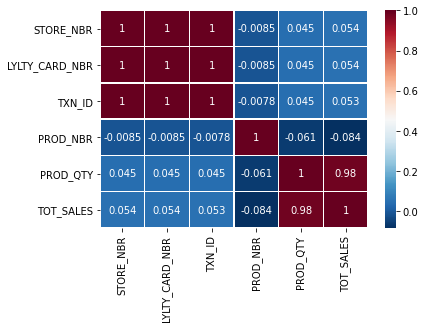

In [ ]:
import seaborn as sb
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)